# Определение перспективного тарифа для телеком компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.




# Шаг 1 . Откройте файл с данными и изучите общую информацию.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')




In [19]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [20]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [21]:
internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [23]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [25]:
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [27]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


##  Вывод:
  Обнаружен неверный формат даты во всех таблицах с датами. 
  Необходимо округлить время звонков и мегабайты трафика в большую сторону в соответствии с условиями тарифов.

# Шаг 2.  Предобработка данных

In [29]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')#приводим даты в datetime64
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [30]:
calls['month'] = calls['call_date'].dt.month #добавим колонку "месяц" для сводной таблицы
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month 
calls


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [31]:

calls['duration'] = calls['duration'].apply(np.ceil)#округлим в большую сторону звонки,
calls
#как это делает оператор

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


  Расчеты для каждого пользователя:
  

In [33]:
calls_in_month = calls.pivot_table( # Сводная таблица количества сделанных звонков и израсходованных минут разговора по месяцам;
    index=['user_id', 'month'],
    values='duration',
    aggfunc=['count', 'sum']
)
calls_in_month.columns = ['calls', 'duration']
calls_in_month

calls  duration
user_id month                 
1000    5         22     159.0
        6         43     172.0
        7         47     340.0
        8         52     408.0
        9         58     466.0
...              ...       ...
1498    10        41     247.0
1499    9          9      70.0
        10        68     449.0
        11        74     612.0
        12        69     492.0

[3174 rows x 2 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cdd364fd0>]],
      dtype=object)

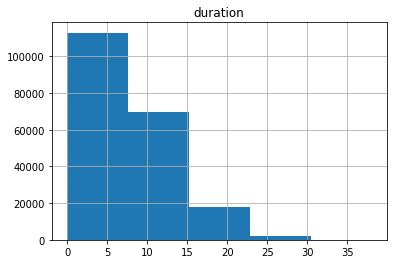

In [34]:
calls.hist('duration', bins=5)

In [35]:
messages_in_month = messages.pivot_table( # Сводная таблица сообщений по месяцам
    index=['user_id', 'month'],
    values='id',
    aggfunc='count'
)
messages_in_month.columns = ['num_messages']
messages_in_month

num_messages
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cd98b9c90>]],
      dtype=object)

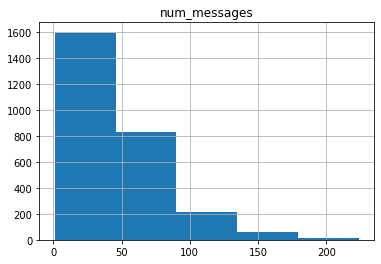

In [36]:
messages_in_month.hist('num_messages', bins=5)

In [37]:
internet_in_month = internet.pivot_table( #Сводная таблица объема  интернет-трафика по месяцам
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum'
)
internet_in_month.columns = ['mb']
internet_in_month

mb
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [38]:
internet['gb_used'] = (internet['mb_used'] / 1024)#в таблице с интернет-трафиком для дальнейшего анализа 
                                                            #переведем мб в гб и округлим в бОльшую сторону

internet['gb_used'] = internet['gb_used'].apply(np.ceil)
internet['gb_used'].where(internet['gb_used'] > 0, 1, inplace=True)  
internet.head(15)



,id,mb_used,session_date,user_id,month,gb_used
0,1000_0,112.95,2018-11-25,1000,11,1.0
1,1000_1,1052.81,2018-09-07,1000,9,2.0
2,1000_2,1197.26,2018-06-25,1000,6,2.0
3,1000_3,550.27,2018-08-22,1000,8,1.0
4,1000_4,302.56,2018-09-24,1000,9,1.0
5,1000_5,399.97,2018-10-02,1000,10,1.0
6,1000_6,540.08,2018-09-07,1000,9,1.0
7,1000_7,415.70,2018-07-11,1000,7,1.0
8,1000_8,505.40,2018-10-08,1000,10,1.0
9,1000_9,345.54,2018-09-03,1000,9,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cd9833250>]],
      dtype=object)

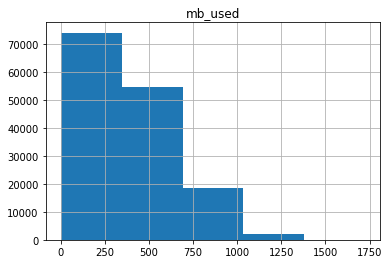

In [39]:
internet.hist('mb_used', bins=5)

В процессе обработки данных нашли следующие ошибки:
в таблице internet был найден некорректный столбец Unnamed: 0 - удален

формат столбцов с датами был некорректным - исправлен формат

длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки либо звонки, когда клиент не дозвонился до адресата. Оставлены как есть. Они никак не повлияют на сумму использованных минут.

Про построенным гистограммам наблюддаем, что критически выделяющихся значенй в данных нет. 

 Помесячная выручка: 

In [40]:

df_users = calls_in_month.merge(messages_in_month,  on=['user_id', 'month'], how='outer')# Объеденим звонки минуты гигобайты каждого пользователя,
                                                                                         #и добавим тарифный план
df_users = df_users.merge(internet_in_month,  on=['user_id', 'month'], how='outer')
df_users = df_users.reset_index(drop=False)
df_users = df_users.merge(users[['user_id', 'tariff']], on='user_id', how='left')
df_users

,user_id,month,calls,duration,num_messages,mb,tariff
0,1000,5,22.0,159.0,22.0,2253.49,ultra
1,1000,6,43.0,172.0,60.0,23233.77,ultra
2,1000,7,47.0,340.0,75.0,14003.64,ultra
3,1000,8,52.0,408.0,81.0,14055.93,ultra
4,1000,9,58.0,466.0,57.0,14568.91,ultra
...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,smart
3210,1489,10,NaN,NaN,21.0,19559.44,smart
3211,1489,11,NaN,NaN,20.0,17491.56,smart
3212,1489,12,NaN,NaN,35.0,17322.51,smart


In [41]:
df_users.loc[df_users['duration'].isna(), 'duration'] = 0# Заменим пропущенные значения на нули
df_users.loc[df_users['calls'].isna(), 'calls'] = 0
df_users.loc[df_users['num_messages'].isna(), 'num_messages'] = 0
df_users.loc[df_users['mb'].isna(), 'mb'] = 0
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id         3214 non-null int64
month           3214 non-null int64
calls           3214 non-null float64
duration        3214 non-null float64
num_messages    3214 non-null float64
mb              3214 non-null float64
tariff          3214 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 200.9+ KB


In [42]:
def revenue_calc(row):#Вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
    #остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану.
    duration = row['duration']
    calls = row['calls']
    num_messages = row['num_messages']
    mb = row['mb']
    tariff = row['tariff']
    
    if tariff == 'smart':
        over_duration = duration - tariffs.loc[0, 'minutes_included']
        over_mb = mb - tariffs.loc[0, 'mb_per_month_included']
        over_messages = num_messages - tariffs.loc[0, 'messages_included']
        
        if over_duration < 0:
            over_duration = 0
        if over_mb < 0:
            over_mb = 0
        if over_messages < 0:
            over_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * over_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * ((over_mb - 1)//1024+1) + 
                   tariffs.loc[0, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        over_duration = duration - tariffs.loc[1, 'minutes_included']
        over_mb = mb - tariffs.loc[1, 'mb_per_month_included']
        over_messages = num_messages - tariffs.loc[1, 'messages_included']
        
        if over_duration < 0:
            over_duration = 0
        if over_mb < 0:
            over_mb = 0
        if over_messages < 0:
            over_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * over_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * ((over_mb - 1)//1024+1) + 
                   tariffs.loc[1, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )
df_users['revenue'] = df_users.apply(revenue_calc, axis=1)
df_users

,user_id,month,calls,duration,num_messages,mb,tariff,revenue
0,1000,5,22.0,159.0,22.0,2253.49,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,smart,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,smart,950.0


# Вывод:
Привели данные к нужным типам, нашли и исправили ошибки.Провели  вычисления для каждого пользователя.

# Шаг 3. Проанализируйте данные

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

### Звонки



In [43]:
df_users_call_smart = df_users.query('tariff == "smart"') # тариф Смарт
df_users_call_smart



,user_id,month,calls,duration,num_messages,mb,tariff,revenue
8,1001,11,59.0,430.0,0.0,18429.34,smart,1150.0
9,1001,12,63.0,414.0,0.0,14036.66,smart,550.0
10,1002,6,15.0,117.0,4.0,10856.82,smart,550.0
11,1002,7,26.0,214.0,11.0,17580.10,smart,1150.0
12,1002,8,42.0,289.0,13.0,20319.26,smart,1550.0
...,...,...,...,...,...,...,...,...
3208,1489,8,0.0,0.0,17.0,11050.56,smart,550.0
3209,1489,9,0.0,0.0,32.0,17206.30,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,smart,1150.0


In [44]:
df_users_call_smart['duration'].mean()#посчитаем среднее количество минут



417.9349484073576

In [45]:
np.var(df_users_call_smart['duration'], ddof=1)#посчитаем дисперсию



36219.31578434428

In [46]:
np.std(df_users_call_smart['duration'], ddof=1)#посчитаем стандартное отклонение


190.31372988921288

In [47]:
df_users_call_ultra = df_users.query('tariff == "ultra"')# то же самое, но с тарифом Ультра



In [48]:

df_users_call_ultra['duration'].mean()#посчитаем среднее количество минут



526.6233502538071

In [49]:

np.var(df_users_call_ultra['duration'], ddof=1)#дисперсию



100873.63339730098

In [50]:

np.std(df_users_call_ultra['duration'], ddof=1)#стандартное отклонение

317.6060978591264

Text(0.5, 1.0, 'Гистограмма звонков')

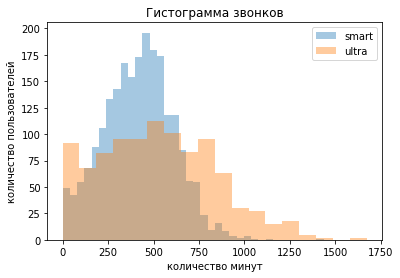

In [51]:
smart = df_users.query("tariff == 'smart'")
ultra = df_users.query("tariff == 'ultra'")
sns.distplot(smart['duration'], kde=False)
sns.distplot(ultra['duration'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.title('Гистограмма звонков')

Распределение гистограммы по тарифу Смарт можно назвать нормальным, видно, что большая часть значений действительно лежит в промежутке, который мы выявили ранее. Абсолютное большинство абонентов тарифа smart используют от 175  до 620 минут звонков в месяц.

Гистограмма по тарифу Ультра скошена вправо. Это говорит о том, что значение медианы меньше среднего, значит, есть ряд высоких значений, которые влияют на среднее, но не влияют на медиану. Видим, что основная масса пользователей использует 400-650 минут в месяц.

### Cообщения


In [52]:
df_users_message_smart = df_users.query('tariff == "smart"')# тариф Смарт
df_users_message_smart

,user_id,month,calls,duration,num_messages,mb,tariff,revenue
8,1001,11,59.0,430.0,0.0,18429.34,smart,1150.0
9,1001,12,63.0,414.0,0.0,14036.66,smart,550.0
10,1002,6,15.0,117.0,4.0,10856.82,smart,550.0
11,1002,7,26.0,214.0,11.0,17580.10,smart,1150.0
12,1002,8,42.0,289.0,13.0,20319.26,smart,1550.0
...,...,...,...,...,...,...,...,...
3208,1489,8,0.0,0.0,17.0,11050.56,smart,550.0
3209,1489,9,0.0,0.0,32.0,17206.30,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,smart,1150.0


In [53]:
#посчитаем среднее количество сообщений в месяц для пользователей Смарт
df_users_message_smart['num_messages'].mean()

33.384028712427096

In [54]:
#посчитаем дисперсию
np.var(df_users_message_smart['num_messages'], ddof=1)

796.8129584480083

In [55]:
#стандартное отклонение
np.std(df_users_message_smart['num_messages'], ddof=1)


28.22787555676141

In [56]:
df_users_message_ultra = df_users.query('tariff == "ultra"')#то же самое, но с тарифом Ультра



In [57]:
#посчитаем среднее количество сообщений в месяц для пользователей Ультра
df_users_message_ultra['num_messages'].mean()

49.36345177664975

In [58]:
#дисперсию
np.var(df_users_message_ultra['num_messages'], ddof=1)

2285.2661425446736

In [59]:
#среднее отклонение
np.std(df_users_message_ultra['num_messages'], ddof=1)

47.804457350174715

Text(0.5, 1.0, 'Гистограмма сообщений')

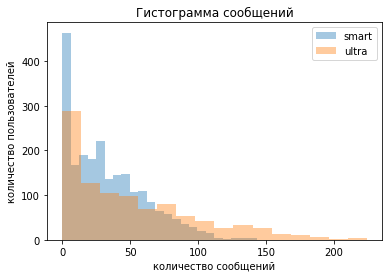

In [60]:
smart = df_users.query("tariff == 'smart'")
ultra = df_users.query("tariff == 'ultra'")
sns.distplot(smart['num_messages'], kde=False)
sns.distplot(ultra['num_messages'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей')
plt.title('Гистограмма сообщений')

Отображенные гистаграммы показывают, что дисперсия по "Ультра" больше, чем у пользователей с тарифом "Смарт". Пользователи тарифа Смарт явно себя ограничивают

Основная масса пользователей ultra использует еще меньше сообщений, чем в smart. Однако, опять-таки, есть и те, кто отправляет 100 и больше сообщений. Но лимита в 1000 сообщений не достигает никто.

### Интернет траффик 

In [61]:
df_users_smart_mb = df_users.query('tariff == "smart"')# тариф Смарт
df_users_smart_mb

,user_id,month,calls,duration,num_messages,mb,tariff,revenue
8,1001,11,59.0,430.0,0.0,18429.34,smart,1150.0
9,1001,12,63.0,414.0,0.0,14036.66,smart,550.0
10,1002,6,15.0,117.0,4.0,10856.82,smart,550.0
11,1002,7,26.0,214.0,11.0,17580.10,smart,1150.0
12,1002,8,42.0,289.0,13.0,20319.26,smart,1550.0
...,...,...,...,...,...,...,...,...
3208,1489,8,0.0,0.0,17.0,11050.56,smart,550.0
3209,1489,9,0.0,0.0,32.0,17206.30,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,smart,1150.0


In [62]:
#посчитаем среднее количество мегабайт в месяц для пользователей Смарт
df_users_smart_mb['mb'].mean()

16208.386989681472

In [63]:
#дисперсию
np.var(df_users_smart_mb['mb'], ddof=1)

34462496.46274242

In [64]:
#среднее отклонение
np.std(df_users_smart_mb['mb'], ddof=1)

5870.476681049199

In [65]:
df_users_ultra_mb = df_users.query('tariff == "ultra"')#то же самое, но с тарифом Ультра


In [66]:
#посчитаем среднее количество мегабайт в месяц для пользователей Ультра
df_users_ultra_mb['mb'].mean()

19468.805208121827

In [67]:
#дисперсию
np.var(df_users_ultra_mb['mb'], ddof=1)

101751013.78335385

In [68]:
#стандартное отклонение
np.std(df_users_ultra_mb['mb'], ddof=1)

10087.170752166034

Text(0.5, 1.0, 'Гистограмма интернет траффика')

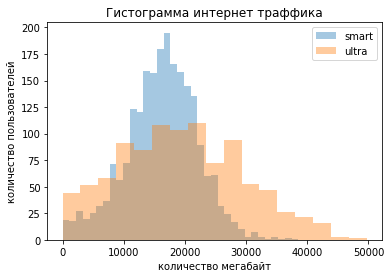

In [69]:
smart = df_users.query("tariff == 'smart'")
ultra = df_users.query("tariff == 'ultra'")
sns.distplot(smart['mb'], kde=False)
sns.distplot(ultra['mb'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество мегабайт')
plt.ylabel('количество пользователей')
plt.title('Гистограмма интернет траффика')

Пользователи тарифа ultra используют гораздо больше трафика, чем пользователи более дешевого тарифа. Можно предположить, что те, кто выбирает тариф ultra заинтересованы именно в более активном пользовании интернетом.

Выводы:
Пользователи тарифа Ультра потребляют больше услуг и платят больше. Пользователям тарифа смарт не хватает выделенного объема услуг

###  Посчитал дисперсию,среднее значение и стандартное отклонение исходя из данных предыдущей таблицы.В построении гистограмм так же использовал срезы из  таблицы   df_users


## Вывод:
Дисперсия тарифа Ультра больше, а медианы смещены в большую сторону. Этот тариф выгодее для оператора.

# Шаг 4. Проверка гипотез


Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Формируем гимотезы:

Нулевая гипотеза: H0 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

Альтернативная гипотеза:H1 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" различна

Критический уровень статистической значимости 5%, можно брать и меньше, но есть риск отбросить работающую гипотезу.

In [70]:
alpha = 0.05 
results = st.ttest_ind(
    smart['revenue'], 
    ultra['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


# Вывод:
Вероятность очень близка к нулю. На основании полученных результатов, можем предположить, что 
средняя выручка пользователей тарифов «Ультра» и «Смарт»  различаются.





Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза:H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.

Альтернативная гипотеза:H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из регионов.

Критический уровень статистической значимости 5%


In [71]:
df_users = df_users.merge(users[['user_id', 'city',]], on='user_id', how='left')
moscow = df_users.query('city == "Москва"')['revenue']
regions = df_users.query('city != "Москва"')['revenue']
alpha = 0.05 
results = st.ttest_ind(moscow, regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


# Вывод:
C вероятностью 59% - не получилось отвергнуть нулевую гипотезу. Это значит, что средняя выручка по Москве не отличается от выручки по другим регионам.


In [72]:
users['tariff'].value_counts() #посчитаем колличество пользователей каждого тарифа

smart    351
ultra    149
Name: tariff, dtype: int64

# Общий вывод
По результатам анализа для оператора доходы от тарифа «Ультра»(2062р.) больше, чем от тарифа «Смарт»(1330р.)

Судя по гистограммам не все пользователи тарифа «Ультра» вырабатывают весь доступный лимит.

Колличество пользователей таррифа «Смарт» больше в 2 раза, что можно объяснить более приемлемой ценой тарифа.

Доплат по тарифу «Ультра» очень мало. В тарифе «Смарт» часто доплачивают за дополнительные пакеты гигобайт. 

Лимита на звонки и минуты в «Ультра» в среднем не достигает никто. При этом интернетом пользователи «Ультра» пользуются гораздо активнее. Скорее всего, пользователи ultra выбирают этот тариф из-за большего интернет-трафика.

Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах

Тариф «Ультра» приносит компании бОльшую выручку. Стоит сфокусироваться на его продвижении повсеместно.
